## Summer Analytics 2020 Capstone Project (Organized by Consulting & Analytics Club, IIT Guwahati)

### Objective : Predicting Employee Attrition in the Dawn of Recession

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

## Step 1: Importing Libraries 

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math
#import scipy.stats as ss

#Data Analysis
import pandas as pd
import numpy as np

#Data Visulaization
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import LabelEncoder,RobustScaler,MinMaxScaler

#Feature Selection
from sklearn.feature_selection import SelectKBest,chi2,RFE,SelectFromModel
 
#Machine Learning
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix
import xgboost as xgb


#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


#Let's act BOLD and ignore Warnings for now
import warnings
warnings.filterwarnings(action='ignore')

C:\Users\Basabee Bora\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Basabee Bora\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Basabee Bora\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


## Step 2:  Importing Data

In [2]:
#Reading csv file in pandas dataframe format
data = pd.read_csv('train.csv')
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

## Step 3 : Exploratory Data Analysis (EDA)

### What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

In [4]:
data.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

##### Thank God! We don't have any.

### Check Balance of Classes

• Look at proportion of classes to see if we're dealing with balanced or imbalanced data, since each one has its own set of tools to be used when fitting classifiers

In [5]:
data['Attrition'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

##### The dataset is Balanced!

In [6]:
#Dropping target and 'Id' column to prepare input data

input_data = data.drop(['Attrition','Id'], axis=1)
target_data = data[['Attrition']]

In [7]:
#Encoding Categorical Columns

labelencoder = LabelEncoder()

input_data['BusinessTravel'] = labelencoder.fit_transform(input_data['BusinessTravel'])
input_data['Department'] = labelencoder.fit_transform(input_data['Department'])
input_data['EducationField'] = labelencoder.fit_transform(input_data['EducationField'])
input_data['Gender'] = labelencoder.fit_transform(input_data['Gender'])
input_data['JobRole'] = labelencoder.fit_transform(input_data['JobRole'])
input_data['MaritalStatus'] = labelencoder.fit_transform(input_data['MaritalStatus'])
input_data['OverTime'] = labelencoder.fit_transform(input_data['OverTime'])

In [8]:
input_data.shape

(1628, 27)

### Data Visualization using Histogram

• Let us visualize our data to get a much clearer picture of the data and the significant features.

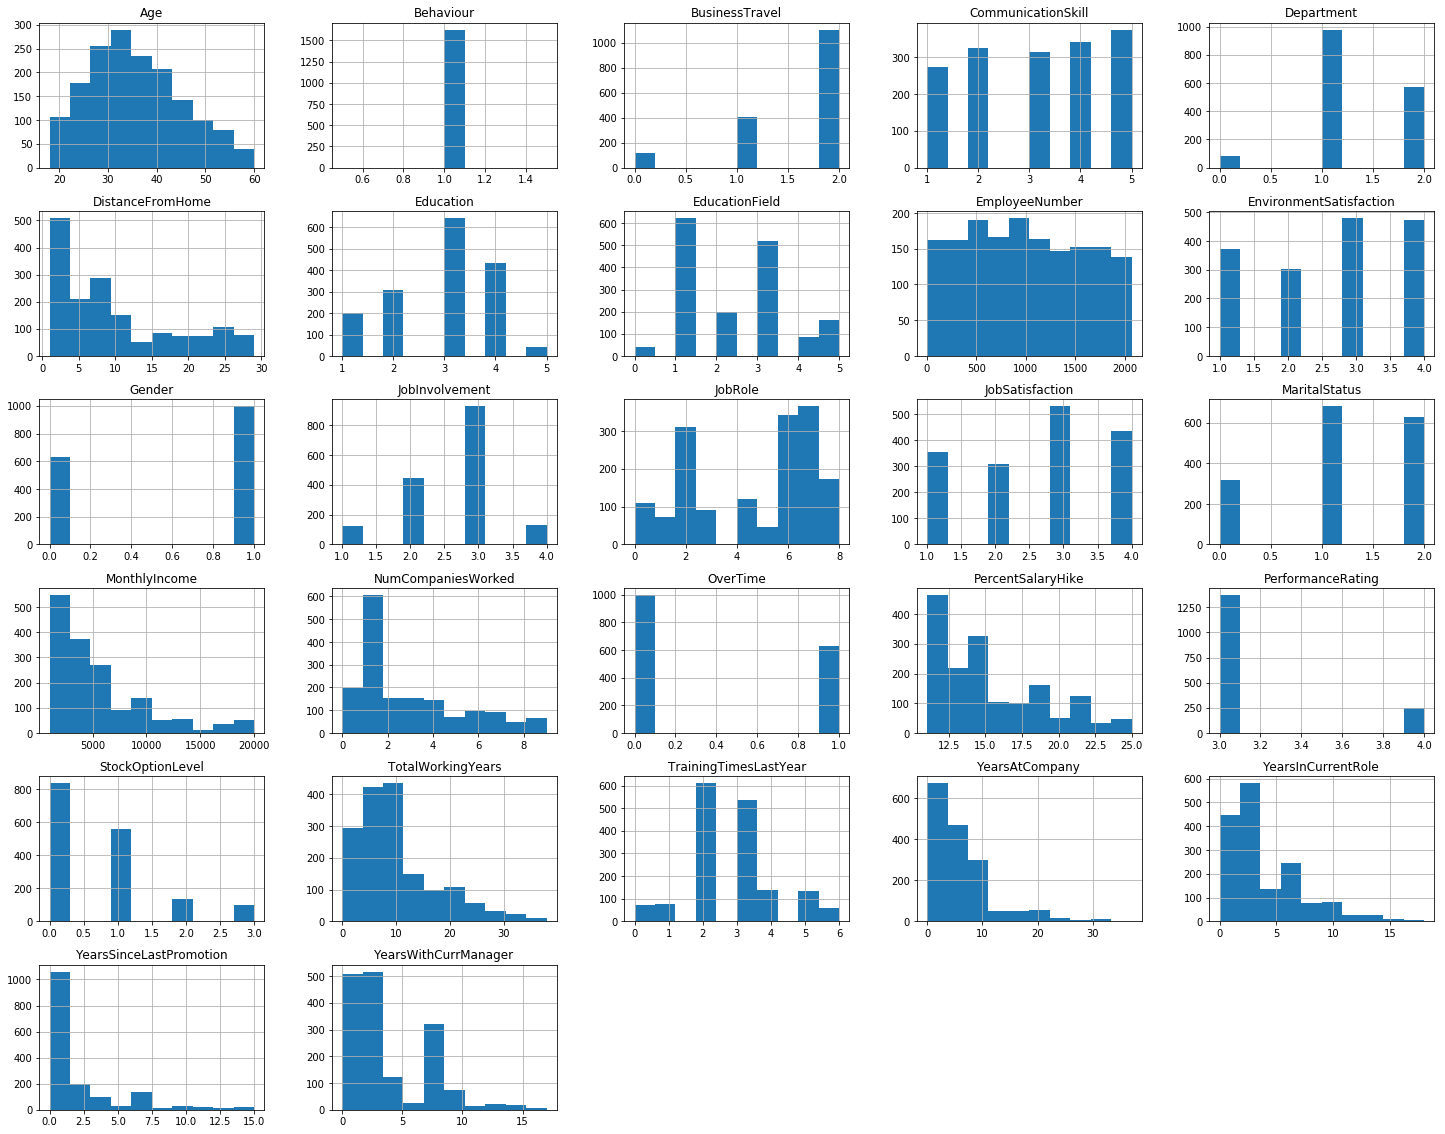

In [9]:
#Histogram of Numerical Variables
num_bins = 10

input_data.hist(bins=num_bins, figsize=(25,20))
plt.savefig("Histogram_Plots")
plt.show()

### Detecting Outliners using Boxplot

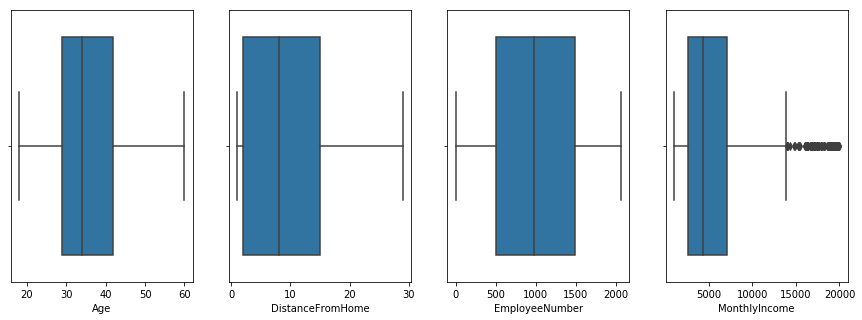

In [10]:
fig, axs = plt.subplots(ncols = 4,figsize=(15,5))

sns.boxplot(x= input_data['Age'], ax=axs[0])
sns.boxplot(x= input_data['DistanceFromHome'], ax=axs[1])
sns.boxplot(x= input_data['EmployeeNumber'], ax=axs[2])
sns.boxplot(x= input_data['MonthlyIncome'], ax=axs[3])

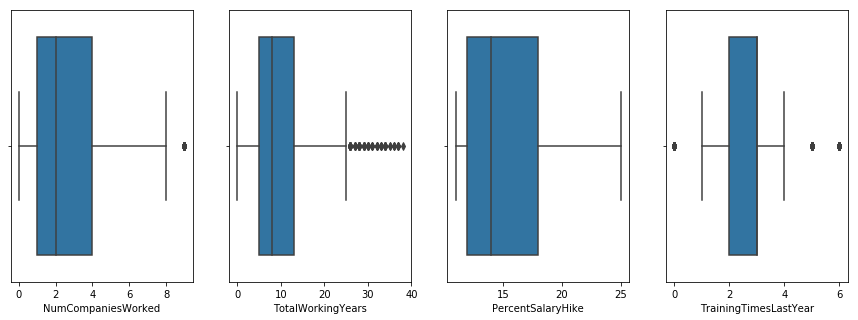

In [11]:
fig, axs = plt.subplots(ncols = 4,figsize=(15,5))

sns.boxplot(x= input_data['NumCompaniesWorked'], ax=axs[0])
sns.boxplot(x = input_data['TotalWorkingYears'], ax=axs[1])
sns.boxplot(x = input_data['PercentSalaryHike'], ax=axs[2])
sns.boxplot(x= input_data['TrainingTimesLastYear'], ax=axs[3])

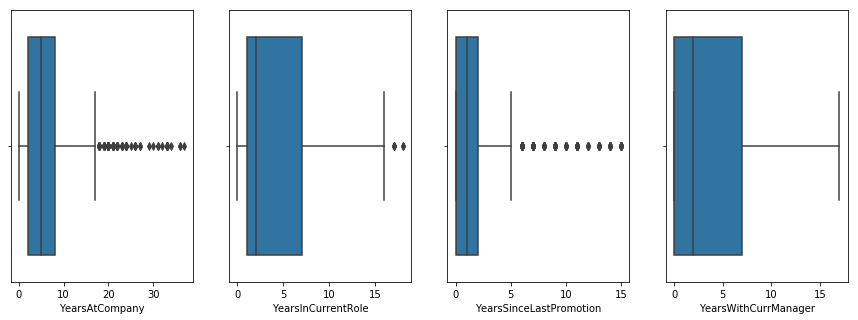

In [12]:
fig, axs = plt.subplots(ncols = 4,figsize=(15,5))

sns.boxplot(x= input_data['YearsAtCompany'], ax=axs[0])
sns.boxplot(x = input_data['YearsInCurrentRole'], ax=axs[1])
sns.boxplot(x = input_data['YearsSinceLastPromotion'], ax=axs[2])
sns.boxplot(x= input_data['YearsWithCurrManager'], ax=axs[3])

##### The features MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion are detected to possess Outliners.

## Step 4 : Feature Selection

#### Set Some Parameters

In [13]:
feature_name = list(input_data.columns)
# no of maximum features we need to select
num_feats = 24

#### Chi-Square Features

• This is a filter-based method.  In this method, we calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [14]:
Input_data_norm = MinMaxScaler().fit_transform(input_data)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(Input_data_norm, target_data)
chi_support = chi_selector.get_support()
chi_feature = input_data.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

24 selected features


In [15]:
chi_feature

['Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'CommunicationSkill']

#### Recursive Feature Elimination

• This is a wrapper based method. Wrapper methods consider the selection of a set of features as a search problem.

• We could use any estimator with the method. In this case, we use LogisticRegression and the RFE observes the coef_ attribute of the LogisticRegression object

In [16]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(input_data, target_data)

Fitting estimator with 27 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=24, step=10, verbose=5)

In [17]:
rfe_support = rfe_selector.get_support()
rfe_feature = input_data.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

24 selected features


In [18]:
rfe_feature

['Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'CommunicationSkill',
 'Behaviour']

#### Tree-based: SelectFromModel

• This is an Embedded method. Embedded methods use algorithms that have built-in feature selection methods.

• We can also use RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. 

• In Random forest, the final feature importance is the average of all decision tree feature importance.

In [19]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, max_features = num_feats))
embeded_rf_selector.fit(input_data, target_data)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=24, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [20]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = input_data.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

9 selected features


In [21]:
embeded_rf_feature

['Age',
 'DistanceFromHome',
 'EmployeeNumber',
 'JobRole',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany']

### BONUS (Combining all of them)

In [22]:
pd.set_option('display.max_rows', None)

# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# display the top 24
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Chi-2,RFE,Random Forest,Total
1,YearsAtCompany,True,True,True,3
2,TotalWorkingYears,True,True,True,3
3,StockOptionLevel,True,True,True,3
4,OverTime,True,True,True,3
5,DistanceFromHome,True,True,True,3
6,Age,True,True,True,3
7,YearsWithCurrManager,True,True,False,2
8,YearsSinceLastPromotion,True,True,False,2
9,YearsInCurrentRole,True,True,False,2
10,TrainingTimesLastYear,True,True,False,2


In [23]:
feature_selection_df.shape

(27, 5)

In [24]:
feature_selection_df.Feature.values

array(['YearsAtCompany', 'TotalWorkingYears', 'StockOptionLevel',
       'OverTime', 'DistanceFromHome', 'Age', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'YearsInCurrentRole',
       'TrainingTimesLastYear', 'NumCompaniesWorked', 'MonthlyIncome',
       'MaritalStatus', 'JobSatisfaction', 'JobRole', 'JobInvolvement',
       'Gender', 'EnvironmentSatisfaction', 'EmployeeNumber',
       'EducationField', 'Education', 'Department', 'CommunicationSkill',
       'BusinessTravel', 'PerformanceRating', 'PercentSalaryHike',
       'Behaviour'], dtype=object)

## Step 5:  Preprocessing of Data

In [25]:
#column selection based on 24 best features

data_selected = input_data[['YearsAtCompany', 'TotalWorkingYears', 'StockOptionLevel',
       'OverTime', 'JobRole', 'DistanceFromHome', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'YearsInCurrentRole',
       'TrainingTimesLastYear', 'NumCompaniesWorked', 'MonthlyIncome',
       'MaritalStatus', 'JobSatisfaction', 'JobInvolvement', 'Gender',
       'EnvironmentSatisfaction', 'EmployeeNumber', 'EducationField',
       'Education', 'Department', 
    'PerformanceRating', 'PercentSalaryHike', 'Behaviour']]

#### Handling Outliners using Transformation

In [26]:
#Log Transformation

data_selected["TotalWorkingYears"] = data_selected["TotalWorkingYears"].map(lambda i: np.log(i) if i > 0 else 0)
data_selected["YearsAtCompany"] = data_selected["YearsAtCompany"].map(lambda i: np.log(i) if i > 0 else 0)
data_selected["TrainingTimesLastYear"] = data_selected["TrainingTimesLastYear"].map(lambda i: np.log(i) if i > 0 else 0)
data_selected["YearsInCurrentRole"] = data_selected["YearsInCurrentRole"].map(lambda i: np.log(i) if i > 0 else 0)
data_selected['NumCompaniesWorked'] = data_selected['NumCompaniesWorked'].map(lambda i: np.log(i) if i > 0 else 0)

In [27]:
#Robust Scaling

robust = RobustScaler(quantile_range = (0.1,0.9))
robust.fit_transform(data_selected.YearsSinceLastPromotion.values.reshape(-1, 1))

array([[ 5.],
       [ 0.],
       [ 6.],
       ...,
       [ 1.],
       [ 1.],
       [-1.]])

In [28]:
#Split data into training and validation samples

X_training, X_validation, y_training, y_validation = train_test_split(data_selected, target_data, 
                                                                      test_size=0.20, random_state= 0)

## Step 6 : Training and Validating the Model

#### Let’s start using this beast of a library — XGBoost.

• In order for XGBoost to be able to use our data, we’ll need to transform it into a specific format that XGBoost can handle. That format is called DMatrix. It’s a very simple one-linear to transform a numpy array of data to DMatrix format.

In [29]:
D_train = xgb.DMatrix(X_training, label=y_training)

#### Defining an XGBoost model

In [30]:
clf = xgb.XGBClassifier()
kfold = KFold(n_splits = 5)

#Using Cross validation to avoid overfitting
results = cross_val_score(clf,X_training,y_training,cv = kfold )

In [31]:
print('Accuracy : {:.5f}'.format(results.mean()*100))

Accuracy : 94.00914


In [32]:
# Fitting the model on Training Data
clf.fit(X_training,y_training, eval_metric= 'auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [33]:
Training_AUC = roc_auc_score(y_training, clf.predict(X_training))
print('Training AUC Score : {:.5f}'.format(Training_AUC))

Training AUC Score : 1.00000


#### Validating on Validation Data

In [34]:
D_val = xgb.DMatrix(X_validation, label=y_validation)

Validation_AUC = roc_auc_score(y_validation, clf.predict(X_validation))
print('Validation AUC Score : {:.5f}'.format(Validation_AUC))

Validation AUC Score : 0.97516


In [35]:
Score_Eva = Training_AUC - Validation_AUC
print('Difference in AUC Score : {:.5f}'.format(Score_Eva))

Difference in AUC Score : 0.02484


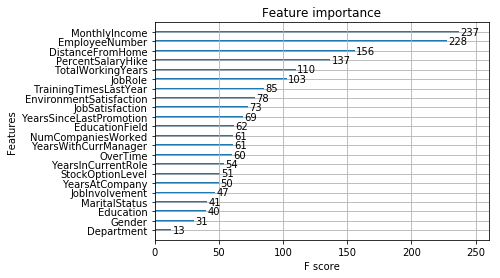

In [36]:
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Further Exploration with XGBoost

There are some more cool features that’ll help you get the most out of your models.

• The simplest parameters are the max_depth (maximum depth of the decision trees being trained), objective (the loss function being used). The eta algorithm requires special attention.

• The gamma parameter can also help with controlling overfitting. It specifies the minimum reduction in the loss required to make a further partition on a leaf node of the tree.

• The booster parameter allows you to set the type of model you will use when building the ensemble. The default is gbtree which builds an ensemble of decision trees. If your data isn’t too complicated, you can go with the faster and simpler gblinear option which builds an ensemble of linear models.

• Setting the optimal hyperparameters of any ML model can be a challenge. So why not let Scikit Learn do it for you? We can combine Scikit Learn’s Randomized Search with an XGBoost classifier quite easily.

In [37]:
param_test = { 'max_depth': [int(x) for x in np.linspace(30, 120, num = 10)],
               'min_samples_split': [2, 5, 10],
               'min_child_weight' : [1,3,5,7],
                'subsample': [0.8,0.9,1],
                 'gamma' : [0,1,5],
                  "colsample_bytree" : [0.3,0.5,0.7,0.8]}

pprint(param_test)

{'colsample_bytree': [0.3, 0.5, 0.7, 0.8],
 'gamma': [0, 1, 5],
 'max_depth': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
 'min_child_weight': [1, 3, 5, 7],
 'min_samples_split': [2, 5, 10],
 'subsample': [0.8, 0.9, 1]}


In [38]:
clf1 = xgb.XGBClassifier(n_estimators = 300, objective='binary:logistic' , 
                         min_samples_leaf = 1,early_stopping_rounds=15)

## Step 7 : Hyperparameter Tuning using RandomizedSearchCV

• The process of hyperparameter tuning means finding the combination of hyperparameter values for a machine learning model that performs the best - as measured on a validation dataset - for a problem.

In [39]:
xgb_random = RandomizedSearchCV(estimator = clf1, param_distributions = param_test, 
                                scoring='f1',n_jobs = -1, verbose=2, 
                              cv=3, return_train_score=True, n_iter = 100)

In [40]:
xgb_random.fit(X_training,y_training, eval_metric= 'error')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


[19:25:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       early_stopping_rounds=15, gamma=None, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, m..._pos_weight=None, subsample=None, tree_method=None,
       validate_parameters=None, verbosity=None),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 5, 10], 'min_child_weight': [1, 3, 5, 7], 'subsample': [0.8, 0.9, 1], 'gamma': [0, 1, 5], 'colsample_bytree': [0.3, 0.5, 0.7, 0.8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=2)

In [41]:
xgb_random.best_params_

{'subsample': 0.9,
 'min_samples_split': 5,
 'min_child_weight': 1,
 'max_depth': 60,
 'gamma': 0,
 'colsample_bytree': 0.7}

In [42]:
xgb_random.best_score_

0.935250368525646

## Step 8 : Calculation of Scores

#### Precision and Recall

• We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

In [43]:
Training_AUC_random = roc_auc_score(y_training, xgb_random.predict(X_training))
print('Training AUC Score : {:.5f}'.format(Training_AUC_random))

Training AUC Score : 1.00000


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_validation, xgb_random.predict(X_validation)))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97       161
          1       0.95      1.00      0.98       165

avg / total       0.98      0.98      0.98       326



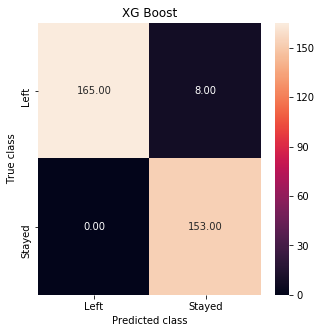

In [45]:
#Confusion Matrix for XFBoost Classifier

y_val_pred = xgb_random.predict(X_validation)

xgb_cm = confusion_matrix(y_val_pred, y_validation, [1,0])
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XG Boost')
plt.savefig('XG_Boost_Confusion_Matrix')

In [46]:
Validation_AUC_random = roc_auc_score(y_validation, xgb_random.predict(X_validation))
print('Validation AUC Score : {:.5f}'.format(Validation_AUC_random))

Validation AUC Score : 0.97516


In [47]:
Score_Eva_random = Training_AUC_random - Validation_AUC_random
print('Difference in AUC Score : {:.5f}'.format(Score_Eva_random))

Difference in AUC Score : 0.02484


## Submission

In [48]:
test = pd.read_csv('test_modified.csv')
test.head(10)

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,1.609438,1.098612,1.609438,0.693147,0.000000,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,2.564949,1.386294,1.945910,1.945910,1.609438,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,2.564949,0.693147,1.945910,1.945910,1.791759,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,2.079442,1.386294,1.386294,1.098612,0.000000,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,2.197225,1.609438,2.197225,1.945910,0.000000,8,2,1
5,6,46,Travel_Rarely,Research & Development,1,4,Medical,288,4,Male,...,3,1,2.833213,1.098612,1.386294,0.693147,0.000000,3,3,1
6,7,27,Travel_Rarely,Research & Development,4,3,Life Sciences,933,2,Female,...,3,0,0.000000,0.693147,0.000000,0.000000,0.000000,0,4,1
7,8,44,Travel_Frequently,Human Resources,1,5,Human Resources,1642,1,Male,...,3,0,2.639057,1.098612,2.302585,1.945910,0.000000,2,1,1
8,9,28,Travel_Rarely,Research & Development,17,3,Technical Degree,1960,3,Male,...,3,1,1.791759,0.693147,1.386294,0.000000,0.000000,3,3,1
9,10,56,Travel_Frequently,Research & Development,9,3,Medical,1071,1,Female,...,3,1,2.890372,1.386294,1.609438,1.386294,0.000000,3,1,1


In [49]:
test['BusinessTravel'] = labelencoder.fit_transform(test['BusinessTravel'])
test['Department'] = labelencoder.fit_transform(test['Department'])
test['EducationField'] = labelencoder.fit_transform(test['EducationField'])
test['Gender'] = labelencoder.fit_transform(test['Gender'])
test['JobRole'] = labelencoder.fit_transform(test['JobRole'])
test['MaritalStatus'] = labelencoder.fit_transform(test['MaritalStatus'])
test['OverTime'] = labelencoder.fit_transform(test['OverTime'])

In [50]:
test_data = test[['YearsAtCompany', 'TotalWorkingYears', 'StockOptionLevel',
       'OverTime', 'JobRole', 'DistanceFromHome', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'YearsInCurrentRole',
       'TrainingTimesLastYear', 'NumCompaniesWorked', 'MonthlyIncome',
       'MaritalStatus', 'JobSatisfaction', 'JobInvolvement', 'Gender',
       'EnvironmentSatisfaction', 'EmployeeNumber', 'EducationField',
       'Education', 'Department', 
    'PerformanceRating', 'PercentSalaryHike', 'Behaviour']]

test_data.shape

(470, 24)

In [51]:
predictions = xgb_random.predict_proba(test_data)
predictions[:10]

array([[9.9968559e-01, 3.1442390e-04],
       [9.8865360e-01, 1.1346379e-02],
       [9.8097211e-01, 1.9027865e-02],
       [9.8148334e-01, 1.8516682e-02],
       [9.9997783e-01, 2.2184915e-05],
       [9.8319328e-01, 1.6806712e-02],
       [8.5226476e-01, 1.4773524e-01],
       [9.6419948e-01, 3.5800491e-02],
       [8.7342536e-01, 1.2657467e-01],
       [9.9879026e-01, 1.2097618e-03]], dtype=float32)

In [52]:
submission = pd.DataFrame()
positive_attrition = [item[1] for item in predictions]


submission['Id'] = test['Id']
submission['Attrition'] = positive_attrition
submission.head()

,Id,Attrition
0,1,0.000314
1,2,0.011346
2,3,0.019028
3,4,0.018517
4,5,0.000022


In [53]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison

#submission.to_csv('submission.csv', index=False)
#print('Submission CSV is ready!')